Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
trainX (60000, 28, 28) and trainy (60000,)
testX (10000, 28, 28),testY (10000,)


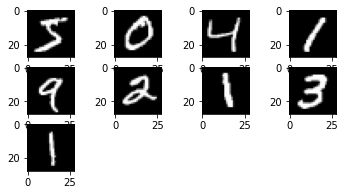

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
(trainX,trainy),(testX,testy)=mnist.load_data()
print("trainX %s and trainy %s"%(trainX.shape,trainy.shape))
print("testX %s,testY %s"%(testX.shape,testy.shape))

for i in range(9):
  pyplot.subplot(440+1+i)
  pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [0]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [0]:
def load_dataset():
    (trainX,trainy),(testX,testy)=mnist.load_data()
    trainX=trainX.reshape(trainX.shape[0],28,28,1)
    testX=testX.reshape(testX.shape[0],28,28,1)
    trainy=to_categorical(trainy)
    testy=to_categorical(testy)
    return trainX,trainy,testX,testy



In [0]:
def prep_pixel(train,test):
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    return train_norm,test_norm


In [0]:
def define_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt=SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return model



In [0]:
def evaluate_model(dataX,datay,n_fold):
  scores,histories=list(),list()
  k_fold=KFold(n_fold,shuffle=True,random_state=1)
  for trainix,testix in k_fold.split(dataX):
    model=define_model()
    trainX,trainY,testX,testY=dataX[trainix],datay[trainix],dataX[testix],datay[testix]
    history=model.fit(trainX,trainY,epochs=10,batch_size=32,validation_data=(testX,testY),verbose=0)
    _,acc=model.evaluate(testX,testY,verbose=0)
    print("%.3f"%(acc*100))
    scores.append(acc)
    histories.append(history)
  return scores,histories


In [0]:
def summarize_diagnostic(histories):
  for i in range(len(histories)):
    pyplot.subplot(221)
    pyplot.title('cross entropyloss')
    pyplot.plot(histories.history['loss'],color='blue',label='train')
    pyplot.plot(histories.history['val_loss'],color='orange',label=test)

    pyplot.subplot(222)
    pyplot.title('accuracy')
    pyplot.plot(histories.history['accuracy'],color='blue',label='train')
    pyplot.plot(histories.history['val_accuracy'],color='orange',label='test')
  pyplot.show()


In [0]:
def summarize_performance(scores):
  print('Accuracy: mean-%.3f std-%.3f ,n-%d'%(mean(scores)*100),std(scores)*100,len(scores))
  pyplot.boxplot(scores)
  pyplot.show()

In [0]:
def run_test_harness():
  trainX,trainY,testX,testY=load_dataset()
  trainX,testX=prep_pixel(trainX,testX)
  scores,histories=evaluate_model(trainX,trainY,5)
  summarize_diagnostic(histories)
  summarize_performance(scores)



In [0]:
run_test_harness()

98.508
98.767
